# Sequence Models

In this class, we relax the assumption that the data points are independently and identically distributed (i.i.d.) by moving to a scenario of structured prediction, where the inputs are assumed to have temporal or spacial dependencies. 

<b> Exercise 2.1 - Hidden Markov Models (HMM) </b>
<br>

Consider a person who is only interested in four activities: walking in the park (walk), shopping (shop), cleaning the apartment (clean) and playing tennis (tennis). Also, consider that the choice of what the person does on a given day is determined exclusively by the weather on that day, which can be either rainy or sunny. Now, supposing that we observe what the person did on a sequence of days, the question is: can we use that information to predict the weather on each of those days? To tackle this problem, we assume that the weather behaves as a discrete Markov chain: the weather on a given day depends only on the weather on the previous day. The entire system can be described as an HMM.
For example, assume we are asked to predict the weather conditions on two different sequences of days. During these two sequences, we observed the person performing the following activities:
<br>
<ul>
<li> “walk walk shop clean” </li>
<li> “clean walk tennis walk” </li>
</ul>
-> This will be our test set.
<br>
<br>
Moreover, and in order to train our model, we are given access to three different sequences of days, containing both
the activities performed by the person and the weather on those days, namely: 
<br>
<ul>
<li>“walk/rainy walk/sunny shop/sunny clean/sunny”</li>
<li>“walk/rainy walk/rainy shop/rainy clean/sunny”</li>
<li>“walk/sunny shop/sunny shop/sunny clean/sunny”</li>
</ul>
<br>
-> This will be our training set.

> Load the simple sequence dataset. From the ipython command line create a simple sequence object and look at the training and test set.

In [1]:
from __future__ import division
import lxmls.readers.simple_sequence as ssr
simple = ssr.SimpleSequence()

In [2]:
print "Train dataset:\n", simple.train
print "Test dataset:\n", simple.test

Train dataset:
[walk/rainy walk/sunny shop/sunny clean/sunny , walk/rainy walk/rainy shop/rainy clean/sunny , walk/sunny shop/sunny shop/sunny clean/sunny ]
Test dataset:
[walk/rainy walk/sunny shop/sunny clean/sunny , clean/sunny walk/sunny tennis/sunny walk/sunny ]


> Get in touch with the classes used to store the sequences, you will need this for the next exercise. Note that each label is internally stored as a number. This number can be used as index of an array to store information regarding that label.

In [3]:
for sequence in simple.train.seq_list: 
    print "Each sequence:", sequence, "\n"

print "\n"

for sequence in simple.train.seq_list: 
    print "Each sequence.x:", sequence.x, "\n"
    
print "\n"
    
for sequence in simple.train.seq_list: 
    print "Each sequence.y:", sequence.y, "\n"

Each sequence: walk/rainy walk/sunny shop/sunny clean/sunny  

Each sequence: walk/rainy walk/rainy shop/rainy clean/sunny  

Each sequence: walk/sunny shop/sunny shop/sunny clean/sunny  



Each sequence.x: [0, 0, 1, 2] 

Each sequence.x: [0, 0, 1, 2] 

Each sequence.x: [0, 1, 1, 2] 



Each sequence.y: [0, 1, 1, 1] 

Each sequence.y: [0, 0, 0, 1] 

Each sequence.y: [1, 1, 1, 1] 



So, the observactions correspond internally to: 
<br>[walk->0, shop->1, clean->2]
<br>[rainy->0, sunny->1]
    

<b> Exercise 2.2 - HMM Maximum Likelihood Training</b>
<br>

The provided function train supervised from the hmm.py file implements the above parameter estimates. Run this function given the simple dataset above and look at the estimated probabilities. 

In [4]:
import lxmls.sequences.hmm as hmmc
hmm = hmmc.HMM(simple.x_dict, simple.y_dict)
hmm.train_supervised(simple.train)

In [5]:
print "Initial Probabilities:", hmm.initial_probs, "\n"
print "Transition Probabilities:", hmm.transition_probs, "\n"
print "Final Probabilities:", hmm.final_probs, "\n"
print "Emission Probabilities", hmm.emission_probs, "\n"

Initial Probabilities: [0.66666667 0.33333333] 

Transition Probabilities: [[0.5   0.   ]
 [0.5   0.625]] 

Final Probabilities: [0.    0.375] 

Emission Probabilities [[0.75  0.25 ]
 [0.25  0.375]
 [0.    0.375]
 [0.    0.   ]] 



> Are they correct? You can also check the variables ending in  counts instead of  probs to see the raw counts (for example, typing hmm.initial counts will show you the raw counts of initial states). How are the counts related to the probabilities?

To answer the question, we can checks the implementation is correct with the following sanity checks:
<ul>
<li> Initial Counts: – Should sum to the number of sentences</li>
<li> Transition/Final Counts: – Should sum to the number of tokens </li>
<li> Emission Counts: – Should sum to the number of tokens </li>
</ul>

In [6]:
number_of_tokens=sum([len(seq) for seq in simple.train])

print "The inial counts are correct:",  sum(hmm.initial_counts)==len(simple.train.seq_list)
print "Transition and Final counts are correct:",hmm.transition_counts.sum()+ hmm.final_counts.sum()==number_of_tokens
print "Emission counts are correct:", hmm.emission_counts.sum()==number_of_tokens

The inial counts are correct: True
Transition and Final counts are correct: True
Emission counts are correct: True


<b> Exercise 2.3 - Decoding a Sequence </b>
<br> 
Convince yourself that the score of a path in the trellis (summing over the scores above) is equivalent to the log-probability log P(X = x, Y = y), as defined in Eq. 2.2. Use the given function compute scores on the first training sequence. Confirm that the values are correct. You should get the same values as presented below.

In [7]:
initial_scores, transition_scores, final_scores, emission_scores = hmm.compute_scores(simple.train.seq_list[0])
print "Initial scores", initial_scores, "\n"
print "Transition scores", transition_scores, "\n"
print "Final scores", final_scores, "\n"
print "Emission scores", emission_scores, "\n"

Initial scores [-0.40546511 -1.09861229] 

Transition scores [[[-0.69314718        -inf]
  [-0.69314718 -0.47000363]]

 [[-0.69314718        -inf]
  [-0.69314718 -0.47000363]]

 [[-0.69314718        -inf]
  [-0.69314718 -0.47000363]]] 

Final scores [       -inf -0.98082925] 

Emission scores [[-0.28768207 -1.38629436]
 [-0.28768207 -1.38629436]
 [-1.38629436 -0.98082925]
 [       -inf -0.98082925]] 



lxmls/sequences/hmm.py:188: RuntimeWarning: divide by zero encountered in log
  transition_scores[pos-1, :, :] = np.log(self.transition_probs)
lxmls/sequences/hmm.py:186: RuntimeWarning: divide by zero encountered in log
  emission_scores[pos, :] = np.log(self.emission_probs[sequence.x[pos], :])
lxmls/sequences/hmm.py:191: RuntimeWarning: divide by zero encountered in log
  final_scores = np.log(self.final_probs)


<b> Exercise 2.4 - Computing in log-domain</b> 
<br>
Look at the module sequences/log domain.py. This module implements a function logsum pair(logx, logy) to add two numbers represented in the log-domain; it returns their sum also represented in the log-domain. The function logsum(logv) sums all components of an array represented in the log-domain. This will be used later in our decoding algorithms. To observe why this is important, type the following:

In [8]:
import numpy as np
a = np.random.rand(10) 

print np.log(sum(np.exp(a))) 
print np.log(sum(np.exp(10*a)))
print np.log(sum(np.exp(100*a)))
print np.log(sum(np.exp(1000*a)))

print "\nVS\n"
from lxmls.sequences.log_domain import *

print logsum(a)
print logsum(10*a)
print logsum(100*a)
print logsum(1000*a)

2.9004691857829754
9.900454359630778
95.02317525550674
inf

VS

2.9004691857829754
9.90045435963078
95.02317525550674
950.2317518008309


/Users/RitaRamos/anaconda/envs/mypy26/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


<b> Exercise 2.5 </b>
<br> Run the provided forward-backward algorithm on the first train sequence. Observe that both the forward and the backward passes give the same log-likelihood.

In [9]:
log_likelihood, forward = hmm.decoder.run_forward(initial_scores, transition_scores,
    final_scores, emission_scores)
print 'Log-Likelihood =', log_likelihood

Log-Likelihood = -5.068232326005127


In [10]:
log_likelihood, backward = hmm.decoder.run_backward(initial_scores, transition_scores,
    final_scores, emission_scores)
print 'Log-Likelihood =', log_likelihood

Log-Likelihood = -5.068232326005126


<b> Exercise 2.6 </b>
<br>
Compute the node posteriors for the first training sequence (use the provided compute posteriors func- tion), and look at the output. Note that the state posteriors are a proper probability distribution (the lines of the result sum to 1).

In [11]:
initial_scores, transition_scores, final_scores, emission_scores = hmm.compute_scores(simple.train.seq_list[0])
state_posteriors, _, _ = hmm.compute_posteriors(initial_scores,transition_scores,final_scores,emission_scores)
 
print state_posteriors

[[0.95738152 0.04261848]
 [0.75281282 0.24718718]
 [0.26184794 0.73815206]
 [0.         1.        ]]


<b> Exercise 2.7 </b>
<br>
Run the posterior decode on the first test sequence.

In [12]:
y_pred = hmm.posterior_decode(simple.test.seq_list[0])
print "Prediction test 0:", y_pred
print "Truth test 0:     ", simple.test.seq_list[0]

Prediction test 0: walk/rainy walk/rainy shop/sunny clean/sunny 
Truth test 0:      walk/rainy walk/sunny shop/sunny clean/sunny 


> Evaluate it.

In [13]:
def evaluate(y_seq, predicted_y_seq , number_of_classes):
    accuracy=0
    precision=0
    recall=0
    evaluations=0
    for class_i in number_of_classes:
        elements_correct= sum(1 for i in range(len(y_seq)) if predicted_y_seq[i]==class_i and predicted_y_seq[i]==y_seq[i])
        if elements_correct != 0:
            accuracy+=elements_correct #accuracy is the nº of elements correctly predicted of each class
            precision+=elements_correct/(predicted_y_seq == class_i).sum(0) #precision of each class
            recall+=elements_correct/ (y_seq).count(class_i)                #recall of class y
            evaluations+=1
    print "\nAccuracy:", accuracy, "\n"
    if evaluations !=0:
        print "Precision:", precision/evaluations, "\n"
        print "Recall:", recall/evaluations,"\n"

In [14]:
evaluate(simple.test.seq_list[0].y, y_pred.y, simple.y_dict.values())


Accuracy: 3 

Precision: 0.75 

Recall: 0.833333333333 



> Do the same for the second test sequence:

In [15]:
y_pred = hmm.posterior_decode(simple.test.seq_list[1])
print "Prediction test 1:", y_pred
print "Truth test 1:     ", simple.test.seq_list[1]

evaluate(simple.test.seq_list[1].y, y_pred.y, simple.y_dict.values())

Prediction test 1: clean/rainy walk/rainy tennis/rainy walk/rainy 
Truth test 1:      clean/sunny walk/sunny tennis/sunny walk/sunny 

Accuracy: 0 



lxmls/sequences/sequence_classifier.py:79: RuntimeWarning: invalid value encountered in subtract
  state_posteriors[pos, :] -= log_likelihood
lxmls/sequences/sequence_classifier.py:92: RuntimeWarning: invalid value encountered in double_scalars
  transition_posteriors[pos, state, prev_state] -= log_likelihood


> What is wrong? Note the observations for the second test sequence: the observation tennis was never seen at training time, so the probability for it will be zero (no matter what state). This will make all possible state sequences have zero probability. As seen in the previous lecture, this is a problem with generative models, which can be corrected using smoothing (among other options).

> <br> Change the train supervised method to add smoothing:

In [16]:
hmm.train_supervised(simple.train, smoothing=0.1) 

In [17]:
y_pred = hmm.posterior_decode(simple.test.seq_list[0])
print "Smoothing Prediction test 0:", y_pred
print "Smoothing Truth test 0:     ", simple.test.seq_list[0]
evaluate(simple.test.seq_list[0].y, y_pred.y, simple.y_dict.values())

Smoothing Prediction test 0: walk/rainy walk/rainy shop/sunny clean/sunny 
Smoothing Truth test 0:      walk/rainy walk/sunny shop/sunny clean/sunny 

Accuracy: 3 

Precision: 0.75 

Recall: 0.833333333333 



In [18]:
y_pred = hmm.posterior_decode(simple.test.seq_list[1])
print "Smoothing Prediction test 1:", y_pred
print "Smoothing Truth test 1:     ", simple.test.seq_list[1]

evaluate(simple.test.seq_list[1].y, y_pred.y, simple.y_dict.values())

Smoothing Prediction test 1: clean/sunny walk/sunny tennis/sunny walk/sunny 
Smoothing Truth test 1:      clean/sunny walk/sunny tennis/sunny walk/sunny 

Accuracy: 4 

Precision: 1.0 

Recall: 1.0 



<b> Exercise 2.8 - Viterbi </b>
<br>
Implement a method for performing Viterbi decoding in file sequence classification decoder.py.

In [19]:
#My implementation in the class decoder.py

def run_viterbi(self, initial_scores, transition_scores, final_scores, emission_scores):

    length = np.size(emission_scores, 0)  # Length of the sequence.
    num_states = np.size(initial_scores)  # Number of states.

    # Variables storing the Viterbi scores.
    viterbi_scores = np.zeros([length, num_states]) + logzero()

    # Variables storing the paths to backtrack.
    viterbi_paths = -np.ones([length, num_states], dtype=int)

    # Most likely sequence.
    best_path = -np.ones(length, dtype=int)

    # Initialization.
    viterbi_scores[0, :] = emission_scores[0, :] + initial_scores

    # Viterbi loop.
    for pos in xrange(1, length):
        for current_state in xrange(num_states):

            viterbi_scores[pos, current_state]= np.max(viterbi_scores[pos-1, :] + transition_scores[pos-1, current_state, :])
            viterbi_scores[pos, current_state]+=emission_scores[pos, current_state]
            viterbi_paths[pos, current_state] = np.argmax(viterbi_scores[pos-1, :] + transition_scores[pos-1, current_state, :])

    # Termination.
    best_score = np.max(viterbi_scores[length-1, :] + final_scores)

    #best state
    best_path[-1]=np.argmax(viterbi_scores[length-1, :] + final_scores) 

    for i in xrange(length-2,-1,-1):
        best_path[i]=viterbi_paths[i+1, best_path[i+1]]

    return best_path, best_score

> Test your method on both test sequences.

In [20]:
hmm.train_supervised(simple.train, smoothing=0.1)
y_pred, score = hmm.viterbi_decode(simple.test.seq_list[0])
print "Viterbi decoding Prediction test 0 with smoothing:\n", y_pred, score, "\n"
print "Truth test 0:\n", simple.test.seq_list[0], "\n"
evaluate(simple.test.seq_list[0].y, y_pred.y, simple.y_dict.values())

Viterbi decoding Prediction test 0 with smoothing:
walk/rainy walk/rainy shop/sunny clean/sunny  -6.020501246982869 

Truth test 0:
walk/rainy walk/sunny shop/sunny clean/sunny  


Accuracy: 3 

Precision: 0.75 

Recall: 0.833333333333 



In [21]:
y_pred, score = hmm.viterbi_decode(simple.test.seq_list[1])
print "Viterbi decoding Prediction test 1 with smoothing:\n", y_pred, score, "\n"
print "Truth test 1:\n", simple.test.seq_list[1],  "\n"
evaluate(simple.test.seq_list[1].y, y_pred.y, simple.y_dict.values())


Viterbi decoding Prediction test 1 with smoothing:
clean/sunny walk/sunny tennis/sunny walk/sunny  -11.713974073970887 

Truth test 1:
clean/sunny walk/sunny tennis/sunny walk/sunny  


Accuracy: 4 

Precision: 1.0 

Recall: 1.0 



> Compare the results with the ones given.

Applying viterbi with smoothing had the same results of applying posterior decoding with smoothing, in this particular case. Althought they had the same result for this case in particular, it should be mentioned that, in general, posterior decoding has the downside of not guaranting a valid setence, since it picks the highest state posterior for each position in the sequence; whereas the viterbi picks the best global hidden state sequence.

<b> Part-of-Speech Tagging (POS)</b>
<br>
Part-of-Speech (PoS) tagging is one of the most important NLP tasks. The task is to assign each word a grammatical category, or Part-of-Speech, i.e. noun, verb, adjective,... Recalling the defined notation, Σ is a vocabulary of word types, and Λ is the set of Part-of-Speech tags.
In English, using the Penn Treebank (PTB) corpus (Marcus et al., 1993), the current state of the art for part of speech tagging is around 97% for a variety of methods.
In the rest of this class we will use a subset of the PTB corpus, but instead of using the original 45 tags we will use a reduced tag set of 12 tags, to make the algorithms faster for the class. In this task, x is a sentence (i.e., a sequence of word tokens) and y is the sequence of possible PoS tags.
<br>
<br>
The first step is to load the corpus. We will start by loading 1000 sentences for training and 1000 sentences both for development and testing. Then we train the HMM model by maximum likelihood estimation.

In [22]:
import matplotlib.pyplot as plt
import lxmls.readers.pos_corpus as pcc
corpus = pcc.PostagCorpus()
train_seq = corpus.read_sequence_list_conll("data/train-02-21.conll",max_sent_len=15,
    max_nr_sent=1000)
test_seq = corpus.read_sequence_list_conll("data/test-23.conll",max_sent_len=15,
    max_nr_sent=1000)
dev_seq = corpus.read_sequence_list_conll("data/dev-22.conll",max_sent_len=15,max_nr_sent
    =1000)
hmm = hmmc.HMM(corpus.word_dict, corpus.tag_dict)
hmm.train_supervised(train_seq)
hmm.print_transition_matrix()

In [23]:
print "\nThe tag_ dict:\n", corpus.tag_dict
print "\nExample of train_sequences:\n", train_seq[:5]


The tag_ dict:
{'adv': 8, 'verb': 6, 'noun': 0, 'adp': 1, 'pron': 9, 'det': 2, '.': 4, 'prt': 5, 'num': 3, 'x': 11, 'conj': 7, 'adj': 10}

Example of train_sequences:
[Ms./noun Haag/noun plays/verb Elianti/noun ./. , The/det luxury/noun auto/noun maker/noun last/adj year/noun sold/verb 1,214/num cars/noun in/adp the/det U.S./noun , The/det new/adj rate/noun will/verb be/verb payable/adj Feb./noun 15/num ./. , A/det record/noun date/noun has/verb n't/adv been/verb set/verb ./. , ``/. Apparently/adv the/det commission/noun did/verb not/adv really/adv believe/verb in/adp this/det ideal/noun ./. ''/. ]


Exercise 2.9 Test the model using both posterior decoding and Viterbi decoding on both the train and test set, using the methods in class HMM:

In [24]:
viterbi_pred_train = hmm.viterbi_decode_corpus(train_seq)
posterior_pred_train = hmm.posterior_decode_corpus(train_seq)
eval_viterbi_train = hmm.evaluate_corpus(train_seq, viterbi_pred_train)
eval_posterior_train = hmm.evaluate_corpus(train_seq, posterior_pred_train)
print "Train Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(eval_posterior_train,eval_viterbi_train)


Train Set Accuracy: Posterior Decode 0.985, Viterbi Decode: 0.985


In [25]:
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq)
posterior_pred_test = hmm.posterior_decode_corpus(test_seq)
eval_viterbi_test = hmm.evaluate_corpus(test_seq,viterbi_pred_test)
eval_posterior_test = hmm.evaluate_corpus(test_seq,posterior_pred_test)
print "Test Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(eval_posterior_test,eval_viterbi_test)

Test Set Accuracy: Posterior Decode 0.350, Viterbi Decode: 0.509


> What do you observe?

We can observe a decrease accuracy from the training dataset to the test dataset, which is probably due to the fact that there were words that were not observed at training, leading to zero probabilities (and consequently to misclassifications). To solve this problem we should use smoothing, as we have already did in previous exercises. 

> Remake the previous exercise but now train the HMM using smoothing. Try different values (0,0.1,0.01,1) and report the results on the train and development set. (Use function pick best smoothing).

In [26]:
best_smoothing = hmm.pick_best_smoothing(train_seq, dev_seq, [10,1,0.1,0])

Smoothing 10.000000 --  Train Set Accuracy: Posterior Decode 0.731, Viterbi Decode: 0.691
Smoothing 10.000000 -- Test Set Accuracy: Posterior Decode 0.712, Viterbi Decode: 0.675
Smoothing 1.000000 --  Train Set Accuracy: Posterior Decode 0.887, Viterbi Decode: 0.865
Smoothing 1.000000 -- Test Set Accuracy: Posterior Decode 0.818, Viterbi Decode: 0.792
Smoothing 0.100000 --  Train Set Accuracy: Posterior Decode 0.968, Viterbi Decode: 0.965
Smoothing 0.100000 -- Test Set Accuracy: Posterior Decode 0.851, Viterbi Decode: 0.842
Smoothing 0.000000 --  Train Set Accuracy: Posterior Decode 0.985, Viterbi Decode: 0.985
Smoothing 0.000000 -- Test Set Accuracy: Posterior Decode 0.370, Viterbi Decode: 0.526


In [27]:
hmm.train_supervised(train_seq, smoothing=best_smoothing)
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq)
posterior_pred_test = hmm.posterior_decode_corpus(test_seq)
eval_viterbi_test = hmm.evaluate_corpus(test_seq, viterbi_pred_test)
eval_posterior_test = hmm.evaluate_corpus(test_seq, posterior_pred_test)
print "Best Smoothing %f -- Test Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(best_smoothing,eval_posterior_test,eval_viterbi_test)

Best Smoothing 0.100000 -- Test Set Accuracy: Posterior Decode 0.837, Viterbi Decode: 0.827


> Perform some error analysis to understand were the errors are coming from. You can start by visualizing the confusion matrix (true tags vs predicted tags). You should get something like what is shown in Figure 2.5.

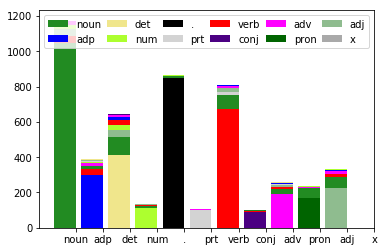

In [28]:
import lxmls.sequences.confusion_matrix as cm
import matplotlib.pyplot as plt
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, viterbi_pred_test, len(
corpus.tag_dict), hmm.get_num_states())
cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(hmm.get_num_states
    ()), 'Confusion matrix')
plt.show()

<b> Unsupervised Learning of HMMs </b>

We next address the problem of unsupervised learning. In this setting, we are not given any labeled data; all we get to see is a set of natural language sentences. The underlying question is:
Can we learn something from raw text?
This task is challenging, since the process by which linguistic structures are generated is not always clear; and even when it is, it is typically too complex to be formally expressed. Nevertheless, unsupervised learning hasbeenappliedtoawiderangeofNLPtasks,suchas:Part-of-SpeechInduction(Schu ̈tze,1995;Merialdo, 1994; Clark, 2003), Dependency Grammar Induction (Klein and Manning, 2004; Smith and Eisner, 2006), Con- stituency Grammar Induction (Klein and Manning, 2004), Statistical Word Alignments (Brown et al., 1993) and Anaphora Resolution (Charniak and Elsner, 2009), just to name a few.
Different motivations have pushed research in this area. From both a linguistic and cognitive point of view, unsupervised learning is useful as a tool to study language acquisition. From a machine learning point of view, unsupervised learning is a fertile ground for testing new learning methods, where significant improvements can yet be made. From a more pragmatic perspective, unsupervised learning is required since annotated corpora is a scarce resource for different reasons. Independently of the reason, unsupervised learning is an increasingly active field of research.

<b> Exercise 2.10 </b>
<br> Implement the method to update the counts given the state and transition posteriors.

In [29]:
  def update_counts(self, sequence, state_posteriors, transition_posteriors):
        """ Used in the E-step in EM."""
        
        states = self.get_num_states()
        N = len(sequence.x) 

        for y in xrange(states):
            self.initial_counts[y] += state_posteriors[0, y]
            
        for y in xrange(states):
            self.final_counts[y] += state_posteriors[N-1, y]
            
        for i in xrange(length):
            x = sequence.x[i]
            for state in xrange(num_states):
                self.emission_counts[x, state] += state_posteriors[i, state]
                if i > 0: 
                    for state_before in xrange(num_states):
                        self.transition_counts[state, state_before] += transition_posteriors[i-1, state, state_before]

> You now have all the pieces to implement the EM algorithm. Look at the code for EM algorithm in file sequences/hmm.py and check it for yourself.

In [30]:
def train_EM(self, dataset, smoothing=0, num_epochs=10, evaluate=True): 
    self.initialize_random()
    if evaluate:
        acc = self.evaluate_EM(dataset)
        print "Initial accuracy: %f"%(acc)
    for t in xrange(1, num_epochs): #E-Step
        total_log_likelihood = 0.0
        self.clear_counts(smoothing)
    for sequence in dataset.seq_list:
        # Compute scores given the observation sequence.
        initial_scores, transition_scores, final_scores, emission_scores = \
                    self.compute_scores(sequence)
        state_posteriors, transition_posteriors, log_likelihood = \
            self.compute_posteriors(initial_scores,
                                    transition_scores,
                                    final_scores,
                                    emission_scores)
        self.update_counts(sequence, state_posteriors, transition_posteriors)
    total_log_likelihood += log_likelihood
    print "Iter: %i Log Likelihood: %f"%(t, total_log_likelihood) #M-Step
    self.compute_parameters()
    if evaluate:
        ### Evaluate accuracy at this iteration
        acc = self.evaluate_EM(dataset)
        print "Iter: %i Accuracy: %f"%(t,acc)


<b> Exercise 2.11 </b>
<br>
Run 20 epochs of the EM algorithm for part of speech induction:

In [31]:
hmm.train_EM(train_seq, 0.1, 20, evaluate=True)
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq)
posterior_pred_test = hmm.posterior_decode_corpus(test_seq)
eval_viterbi_test = hmm.evaluate_corpus(test_seq, viterbi_pred_test)
eval_posterior_test = hmm.evaluate_corpus(test_seq, posterior_pred_test)

Initial accuracy: 0.323680
Iter: 1 Log Likelihood: -101732.453384
Iter: 1 Accuracy: 0.364465
Iter: 2 Log Likelihood: -78078.332344
Iter: 2 Accuracy: 0.381802
Iter: 3 Log Likelihood: -77890.749710
Iter: 3 Accuracy: 0.389919
Iter: 4 Log Likelihood: -77323.487135
Iter: 4 Accuracy: 0.391823
Iter: 5 Log Likelihood: -76066.118912
Iter: 5 Accuracy: 0.391622
Iter: 6 Log Likelihood: -74361.781759
Iter: 6 Accuracy: 0.389718
Iter: 7 Log Likelihood: -72538.030601
Iter: 7 Accuracy: 0.389017
Iter: 8 Log Likelihood: -70645.317981
Iter: 8 Accuracy: 0.386111
Iter: 9 Log Likelihood: -68879.994782
Iter: 9 Accuracy: 0.386111
Iter: 10 Log Likelihood: -67545.008536
Iter: 10 Accuracy: 0.385510
Iter: 11 Log Likelihood: -66720.621561
Iter: 11 Accuracy: 0.385510
Iter: 12 Log Likelihood: -66274.995826
Iter: 12 Accuracy: 0.385409
Iter: 13 Log Likelihood: -66002.604459
Iter: 13 Accuracy: 0.385309
Iter: 14 Log Likelihood: -65794.154720
Iter: 14 Accuracy: 0.385309
Iter: 15 Log Likelihood: -65657.796665
Iter: 15 Accu

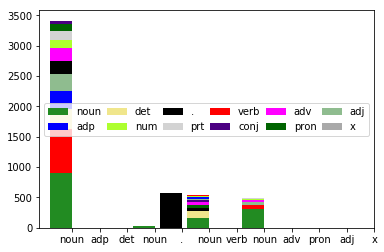

In [32]:
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, viterbi_pred_test, len(corpus.tag_dict), hmm.get_num_states())
cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(hmm.get_num_states()), 'Confusion matrix')